In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

In [4]:
with open('labelTxt-v1.0/Train_Task2_gt/trainset_reclabelTxt/P0000.txt', 'r') as f:
    lines = f.readlines()
    print(lines[0])
    bbox = []
    
# Closing file
f.close()

2753.0 2385.0 2888.0 2385.0 2888.0 2502.0 2753.0 2502.0 plane 0



In [14]:
import pandas as pd

# Read CSV file into DataFrame df
df = pd.read_csv('labelTxt-v1.0/Train_Task2_gt/trainset_reclabelTxt/P0000.txt', header=None, delimiter=' ')

# Show dataframe
#print(df)

data = df.to_numpy()
print(data)

[[2753.0 2385.0 2888.0 ... 2502.0 'plane' 0]
 [3437.0 3391.0 3484.0 ... 3422.0 'large-vehicle' 0]
 [3164.0 4158.0 3195.0 ... 4204.0 'large-vehicle' 0]
 ...
 [1153.0 1766.0 1170.0 ... 1783.0 'small-vehicle' 1]
 [1495.0 2068.0 1507.0 ... 2086.0 'small-vehicle' 1]
 [631.0 4322.0 813.0 ... 4485.0 'plane' 0]]


In [15]:
imgstr = "images-20211114T211012Z-002/images/part1/images/P0000.png"

In [20]:
bbox = [int(x) for x in data[0][:-2]]
print(bbox)

[2753, 2385, 2888, 2385, 2888, 2502, 2753, 2502]


(5502, 3875, 3)
<class 'numpy.ndarray'>
[2753, 2888, 2385, 2385]
(117, 135, 3)


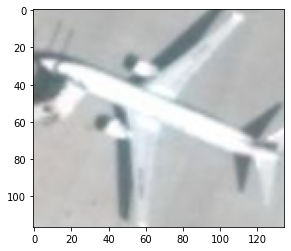

In [22]:
img = Image.open(imgstr)

arr = np.asarray(img)
print(arr.shape)
print(type(arr))

img2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4], :]
print(img2.shape)

plt.imshow(img2)

In [33]:
import os

for root, dirs, filenames in os.walk("images-20211114T211012Z-002/images/part1/images", topdown=False):
    pass

#print(filenames)
j = 0
for file in filenames:
    labelstr = file[:-4] + ".txt"
    df = pd.read_csv('labelTxt-v1.0/Train_Task2_gt/trainset_reclabelTxt/' + labelstr, header=None, delimiter=' ')
    data = df.to_numpy()
    
    imgstr = "images-20211114T211012Z-002/images/part1/images/" + file
    img = Image.open(imgstr)
    arr = np.asarray(img)
    
    for i in range(len(data)):
        bbox = [int(x) for x in data[i][:-2]]
        arr2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4], :]
        
        # create a directory with the class name
        if not os.path.exists(data[i][-2]):
            os.makedirs(data[i][-2])
        
        img2 = Image.fromarray(arr2.astype('uint8'), 'RGB')
        img2 = img2.save(data[i][-2]+"/"+str(j)+".png")
        j += 1

In [34]:
print(j)

33068
